# Import Necessary Libraries

In [1]:
import bs4
import time
import requests
import selenium
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common import keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Scraping Data From Flipkart For EDA and Modelling

In [449]:
driver = webdriver.Chrome()
driver.maximize_window()
time.sleep(1)

url = "https://www.flipkart.com/"
driver.get(url)
wait = WebDriverWait(driver, 3)


try:
    search_bar = driver.find_element(By.XPATH, '//*[@id="container"]/div/div[1]/div/div/div/div/div/div/div/div/div/div[1]/div/div/header/div[1]/div[2]/form/div/div/input')
    search_bar.click()
    search_bar.send_keys("Laptops")
except Exception as e:
    print(f"Error while finding the Search Bar: {e}")
else:
    click_first_element = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="container"]/div/div[1]/div/div/div/div/div/div/div/div/div/div[1]/div/div/header/div[1]/div[2]/form/ul/li[1]')))
    click_first_element.click()

#-------------------------------------------
laptop_df = pd.DataFrame()
for i in range(0,41):
    base_url = f"""https://www.flipkart.com/search?q=laptops&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&
    otracker1=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&as-pos=1&as-type=RECENT&suggestionId=laptops%7CLaptops&
    requestId=5022c935-34ee-404a-818f-ca72a0c595be&as-searchtext=laptops&page={i}"""
    driver.get(base_url)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    boxes = soup.find_all("div", class_ = 'tUxRFH')
    features = soup.find_all('div', class_ = '_6NESgJ')
    
    laptop_names, laptop_price, laptop_mrp, laptop_rating_and_review, laptop_star_rating, laptop_offers, laptop_off = [],[],[],[],[],[],[]
    processors, memory_ram, laptop_window, laptop_ssd, laptop_display, warranty, software = [],[],[],[],[],[],[]
    
    for box in boxes:
        try:
            name = box.find('div', class_ = 'KzDlHZ').get_text(strip = True)
            price = box.find('div', class_ = 'Nx9bqj _4b5DiR').get_text(strip = True)
            mrp = box.find('div', class_ = 'yRaY8j ZYYwLA').get_text(strip = True)
        except:
            np.nan
        try:
            rating_and_review = box.find('span', class_ = 'Wphh3N').get_text(strip = True)
            star_rating = box.find('div', class_ = 'XQDdHH').get_text(strip = True)
            offers = box.find('div', class_ = 'n5vj9c').get_text(strip = True)
            off = box.find('div', class_ = 'UkUFwK').get_text(strip = True)
        except:
            np.nan
        
     
    for feature in features:
        li_tag = feature.find_all('li', class_ = 'J+igdf')
        if len(li_tag) > 0:
            processor = li_tag[0].get_text(strip = True)
    
            RAMs = li_tag[1].get_text(strip = True)
            RAM = RAMs if "RAM" in RAMs else np.nan
    
            window = li_tag[2].get_text(strip = True)
            windows = window if ("windows" in window or "bit" in window or "Operating System" in window) else np.nan
            
            SSDs = li_tag[3].get_text(strip = True)
            SSD = SSDs if 'GB SSD' in SSDs else np.nan
    
            screen = li_tag[4].get_text(strip = True)
            display = screen if ('Display' in screen or 'cm' in screen) else np.nan
            
            try:
                mix_features = li_tag[5].get_text(strip = True)
            except:
                np.nan
            only_war = mix_features if "Warranty"  in mix_features else np.nan
            ssd = mix_features if ( "SSD" in mix_features or "GB" in mix_features) else np.nan
            softwares = mix_features if("Included Software" in mix_features or "Software" in mix_features) else np.nan
            
        warranty.append(only_war)
            # laptop_ssd.append(ssd)
        software.append(softwares)
    
        laptop_names.append(name)
        laptop_price.append(price)
        laptop_mrp.append(mrp)
        laptop_rating_and_review.append(rating_and_review)
        laptop_star_rating.append(star_rating)
        laptop_offers.append(offers) 
        laptop_off.append(off)
        
        processors.append(processor) 
        memory_ram.append(RAM)
        laptop_window.append(windows)
        laptop_ssd.append(SSD)
        laptop_display.append(display)

    data = {
            "laptop_names" : laptop_names, "laptop_price" : laptop_price, "laptop_mrp" : laptop_mrp, "laptop_rating_and_review" : laptop_rating_and_review,
            "laptop_star_rating" : laptop_star_rating, "laptop_offers" : laptop_offers, "laptop_off" : laptop_off, "processors" : processors,
            "memory_ram" : memory_ram, "laptop_ssd" : laptop_ssd, "laptop_window" : laptop_window, "laptop_display" : laptop_display, "warranty" : warranty,
            "software" : software
        }
    
    if i in [10, 20, 30]:
        print(f"We scraped page {i}")
    elif i == 40:
        print(f"Scraping Successfully of {i} pages")

    time.sleep(1)
        
    df = pd.DataFrame(data)
    laptop_df = pd.concat([laptop_df, df], ignore_index = True)
        

We scraped page 10
We scraped page 20
We scraped page 30
Scraping Successfully of 40 pages


In [461]:
# Save scrape data in to CSV file
laptop_df.to_csv('laptop_data.csv', index = False)

## Dataset looks like this before cleaning and Feature Engineering

In [4]:
# Reading file 
df = pd.read_csv(r"C:\Users\sohil\OneDrive\Desktop\IBM DA\laptop_data.csv")
df.head(2)

,laptop_names,laptop_price,laptop_mrp,laptop_rating_and_review,laptop_star_rating,laptop_offers,laptop_off,processors,memory_ram,laptop_ssd,laptop_window,laptop_display,warranty,software
0,Acer Aspire 3 Intel Celeron Dual Core N4500 - ...,"₹20,990","₹29,990","1,322 Ratings&120 Reviews",3.9,Big Billion Days Price,30% off,"Light weight, Portable Laptop\nRAM/Storage: 8G...",NaN,NaN,NaN,NaN,NaN,NaN
1,Acer Aspire 3 Intel Celeron Dual Core N4500 - ...,"₹20,990","₹29,990","1,322 Ratings&120 Reviews",3.9,Big Billion Days Price,30% off,Intel Celeron Quad Core Processor (12th Gen),8 GB LPDDR5 RAM,256 GB SSD,64 bit Windows 11 Home Operating System,35.81 cm (14.1 inch) Display,NaN,"WPS Office, Operating System Software"


# Cleaning the Data and Feature Engineering

In [7]:
df.columns = df.columns.str.replace('laptop','').str.strip()

In [9]:
if df.columns.str.startswith('_').any():
    df.columns= df.columns.str.replace(r'^_','', regex = True)
else:
    df.columns

In [11]:
df.duplicated().sum()

148

In [13]:
df = df.drop_duplicates()

In [15]:
df['brand'] =  df['names'].apply(lambda x : x.split()[0])

In [17]:
df['brand'].nunique()

7

In [19]:
df['brand'].unique()

array(['Acer', 'Lenovo', 'MSI', 'ASUS', 'Primebook', 'DELL', 'HP'],
      dtype=object)

In [21]:
df['price'] = df['price'].str.replace('₹','').str.replace(',','').str.strip().astype('int32')
df['mrp'] = df['mrp'].str.replace('₹','').str.replace(',','').str.strip().astype('int32')

In [23]:
df['number_of_ratings'] = df['rating_and_review'].apply(lambda x : x.split('&')[0])
df['number_of_ratings'] = df['number_of_ratings'].str.replace(',','').str.replace('Ratings', '').str.strip().astype('int32')

In [25]:
df['number_of_review'] = df['rating_and_review'].apply(lambda x : x.split('&')[-1])
df['number_of_review'] = df['number_of_review'].str.replace(',','').str.replace('Reviews', '').str.strip().astype('int32')

In [ ]:
df.drop(columns = ['software', 'rating_and_review', 'brand'])

In [27]:
df['star_rating'].unique()

array([3.9, 4.4, 4.2, 4. , 4.1, 4.3, 4.5])

In [29]:
df['offers'].unique()

array(['Big Billion Days Price', 'Upto₹22,000Off on Exchange',
       'Only 1 left', 'Lowest price since launch', 'Bank Offer',
       'Lowest price in the year'], dtype=object)

In [31]:
df['off'].unique()

array(['30% off', '36% off', '37% off', '41% off', '24% off', '25% off',
       '28% off', '33% off', '26% off', '45% off', '31% off', '21% off',
       '34% off', '29% off', '39% off', '19% off'], dtype=object)

In [33]:
off = df['off'].apply(lambda x : x.replace('%','').replace('off','').strip())
df['off'] = off.astype('int') /100

In [35]:
df['display']= df['display'].astype('category')
df['IS_Touchscreen'] = df['display'].apply(lambda x : 1 if 'Touchscreen' in x else 0)
df['IS_Touchscreen'].apply(lambda x : int(x) if pd.notna(x)  else np.nan)
df['IS_Touchscreen'] = df['IS_Touchscreen'].fillna(0).astype('int8')

In [37]:
df['cm_display'] = df['display'].str.split('cm').str[0]

In [39]:
df['inch_display'] = df['display'].str.split('cm').str[-1]
df['inch_display']  = df['inch_display'].str.replace('Display','').str.replace('inch','')
df['inch_display'] = df['inch_display'].str.replace('(','').str.replace(')','').str.replace('Touchscreen','').str.replace('Inch','').str.strip()

In [41]:
df['display'] = df['display'].astype('object')
df['display'].value_counts().head(10)

display
39.62 cm (15.6 inch) Display              197
39.62 cm (15.6 Inch) Display              154
35.56 cm (14 Inch) Display                119
35.56 cm (14 inch) Display                 85
35.56 cm (14 Inch) Touchscreen Display     45
40.64 cm (16 inch) Display                 42
40.64 cm (16 Inch) Display                 31
98.7 cm (38.86 cm) Display                 27
35.81 cm (14.1 inch) Display               19
35.56 cm (14 inch) Touchscreen Display     10
Name: count, dtype: int64

In [43]:
df['inch_display'] = df['inch_display'].fillna(0)
df['inch_display']

0         0
1      14.1
2      15.6
3      11.6
4        14
       ... 
955      14
956      14
957      14
958    15.6
959    15.6
Name: inch_display, Length: 812, dtype: object

In [45]:
df['processors'].value_counts().head(15)

processors
Intel Core i5 Processor (13th Gen)                                                   123
Intel Core Ultra 5 Processor                                                          97
Intel Core i5 Processor (12th Gen)                                                    82
Intel Core i7 Processor (13th Gen)                                                    64
AMD Ryzen 7 Octa Core Processor                                                       53
Intel Core i3 Processor (13th Gen)                                                    41
Intel Core i3 Processor (12th Gen)                                                    38
AMD Ryzen 5 Hexa Core Processor                                                       36
Intel Celeron Dual Core Processor                                                     28
Light weight, Portable Laptop\nRAM/Storage: 8GB LPDDR4 Ram, 256GB M.2 SSD Storage     27
AMD Ryzen 5 Quad Core Processor                                                       27
AMD Ryzen 

In [47]:
df['processors_type'] = df['processors'].apply(lambda x : ' '.join(x.split()[0:3]))

In [49]:
def processors_type_fetch(processor_name):
    if (processor_name == "Intel Core i5" or processor_name == "Intel Core i3" or processor_name == "Intel Core i7" or 
        processor_name == "Intel Core Ultra" or processor_name == "AMD Ryzen 5" or processor_name == "AMD Ryzen 7" or processor_name == "AMD Ryzen 3"):
        return processor_name
    else:
        if processor_name.split()[0] == "Intel":
            return "Other Intel processors"
        else:
            return "Others"

In [51]:
df['processor'] = df['processors_type'].apply(processors_type_fetch).value_counts()
df['processor']  = df['processors_type'].apply(processors_type_fetch)

In [ ]:
df['memory_ram'].value_counts().head(10)

In [55]:
df['Ram_GB'] = df['memory_ram'].apply(lambda x : 4 if isinstance(x, str) and "4 GB" in x    else 8 if isinstance(x, str) and "8 GB" in x    else 12 if isinstance(x, str) and  "12 GB" in x       
                                   else 16 if isinstance(x, str) and "16 GB" in x     else 24 if isinstance(x, str) and "24 GB" in x    else 18 if isinstance(x, str) and  "18 GB" in x     
                                   else 32 if isinstance(x, str) and "32 GB" in x    else 36 if isinstance(x, str) and  "36 GB" in x    else 48 if isinstance(x, str) and  "48 GB" in x     
                                   else 0)


In [57]:
x = df['memory_ram'].apply(lambda x : x.split("RAM")[0] if isinstance(x, str) else 0)
df['memory_'] = x.apply(lambda x : x.split("GB")[-1] if isinstance(x, str) else 0)

In [65]:
df['memory_'].fillna('LPDDR4X', inplace = True)
df['memory_'] = df['memory_'].replace(0,'LPDDR4X').replace(' ','LPDDR4X')

In [141]:
df['ssd_type'] = df['ssd'].apply(lambda x : 256 if isinstance(x, str) and "256 GB SSD" in x    else 512 if isinstance(x, str) and "512 GB SSD" in x    
                else 128 if isinstance(x, str) and "128 GB SSD" in x    else 1024 if isinstance(x, str) and 
               ("1 TB" and "256 GB SSD") in x else 0)

In [147]:
df['ssd_type'].value_counts()

ssd_type
512    511
0      251
256     48
128      2
Name: count, dtype: int64

In [162]:
df_copy = df.copy()

In [168]:
df.drop(columns = ['rating_and_review', 'memory_ram', 'ssd', 'cm_display', 'names'], inplace = True)

In [186]:
df['warranty_year'] = df['warranty'].apply(lambda x : 1 if isinstance(x, str) and 
                ("1 Year" or "1Yr") in x   else 2 if isinstance(x, str) and "2 Year" in x   else 1)

In [190]:
df['window'].value_counts()

window
Windows 11 Operating System                336
Windows 11 Home Operating System           220
64 bit Windows 11 Operating System         106
64 bit Windows 11 Home Operating System     72
64 bit Windows 10 Operating System          13
Chrome Operating System                      9
Mac OS Operating System                      9
32 bit Windows 11 Operating System           3
64 bit Chrome Operating System               2
64 bit Android Operating System              2
Windows 10 Operating System                  2
64 bit Prime OS Operating System             1
DOS Operating System                         1
64 bit DOS Operating System                  1
Name: count, dtype: int64

In [211]:
df['Operating_system'] = df['window'].apply(lambda x : "Windows 11" if isinstance(x, str) and "Windows 11" in x    
                   else "Windows 10" if isinstance(x, str) and "Windows 10" in x    
                   else "other")

In [226]:
# 1 For 64 bit and 0 for others bit like 32 etc
df['bit_type'] = df['window'].apply(lambda x : 1 if isinstance(x, str) and "64 bit" in x    
                   else 0)

In [230]:
df.drop(columns=['warranty', 'window', 'display', 'offers', 'processors_type', 'software', 'processors'], inplace = True)

In [260]:
# df['processors'].value_counts().head(50)

df['generation'] = df['processors'].apply(lambda x : "13 Gen" if isinstance(x, str) and "13th Gen" in x
                      else "12 Gen" if isinstance(x, str) and "12th Gen" in x
                      else "11 Gen" if isinstance(x, str) and "11th Gen" in x
                      else "14 Gen" if isinstance(x, str) and "14th Gen" in x
                      else "10 Gen" if isinstance(x, str) and "10th Gen" in x
                      else "3 Gen")

df['generation'] = df['generation'].str.replace('3 Gen', '10 Gen')
df['generation'] = df['generation'].str.replace('110', '11')

In [313]:
df['inch_display'] = pd.to_numeric(df['inch_display'], errors='coerce')

df['display_category'] = pd.cut(
    df['inch_display'],
    bins=[0, 13, 15, 17, 20],
    labels=['Small', 'Medium', 'Large', 'Extra Large']
)


In [337]:
df['display_category'] = df['display_category'].fillna('Medium')

In [367]:
df['inch_display'] = df['inch_display'].fillna(df['inch_display'].mode())

In [351]:
df['inch_display'].unique()

array([ 0.  , 14.1 , 15.6 , 11.6 , 14.  ,   nan, 16.  , 15.  , 13.3 ,
       15.3 , 13.8 , 13.6 , 12.4 , 16.1 , 17.  , 14.5 , 33.78])

In [353]:
df['inch_display'].value_counts()

inch_display
15.60    351
14.00    259
16.00     76
0.00      47
14.10     19
13.30      7
15.00      6
16.10      6
11.60      5
15.30      2
13.80      2
13.60      1
12.40      1
17.00      1
14.50      1
33.78      1
Name: count, dtype: int64

In [355]:
df['inch_display'].mode()

0    15.6
Name: inch_display, dtype: float64

In [363]:
df['inch_display'].unique()

array([None], dtype=object)

In [373]:
df.drop(columns = ('inch_display'), inplace = True)
df['display_inch'] = df_copy['inch_display']

In [402]:
df.duplicated().sum()

40

In [406]:
df.drop_duplicates(inplace = True)

In [412]:
df.duplicated().sum()

0

In [460]:
# Ensure column is numeric first
df['display_inch'] = pd.to_numeric(df['display_inch'], errors='coerce')

# Find mode (most frequent value)
mode_value = df['display_inch'].mode()[0]

# Replace NaN or empty values with mode
df['display_inch'] = df['display_inch'].replace("", np.nan)  # replace empty string with NaN
df['display_inch'] = df['display_inch'].fillna(mode_value)

In [416]:
df.isnull().sum()

price                0
mrp                  0
star_rating          0
off                  0
brand                0
number_of_ratings    0
number_of_review     0
IS_Touchscreen       0
processor            0
Ram_GB               0
memory_              0
ssd_type             0
warranty_year        0
Operating_system     0
bit_type             0
generation           0
display_category     0
display_inch         0
dtype: int64

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to 959
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              769 non-null    int32   
 1   mrp                769 non-null    int32   
 2   star_rating        769 non-null    float64 
 3   off                769 non-null    float64 
 4   brand              769 non-null    object  
 5   number_of_ratings  769 non-null    int32   
 6   number_of_review   769 non-null    int32   
 7   IS_Touchscreen     769 non-null    int8    
 8   processor          769 non-null    object  
 9   Ram_GB             769 non-null    int64   
 10  memory_            769 non-null    object  
 11  ssd_type           769 non-null    int64   
 12  warranty_year      769 non-null    int64   
 13  Operating_system   769 non-null    object  
 14  bit_type           769 non-null    int64   
 15  generation         769 non-null    object  
 16  display_categ

In [634]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,769.0,65678.728218,35430.432468,19990.00,37990.00,59990.00,73190.00,164990.00
mrp,769.0,95500.743823,46662.338671,27990.00,62990.00,84990.00,114690.00,229990.00
star_rating,769.0,4.184005,0.181764,3.90,4.00,4.20,4.40,4.50
off,769.0,0.310208,0.064224,0.19,0.25,0.31,0.36,0.45
number_of_ratings,769.0,508.262679,995.115327,4.00,21.00,72.00,443.00,4791.00
number_of_review,769.0,44.691808,97.846140,0.00,2.00,9.00,49.00,540.00
IS_Touchscreen,769.0,0.083225,0.276402,0.00,0.00,0.00,0.00,1.00
Ram_GB,769.0,13.196359,6.440771,0.00,8.00,16.00,16.00,36.00
ssd_type,769.0,331.901170,235.857678,0.00,0.00,512.00,512.00,512.00
warranty_year,769.0,1.032510,0.177465,1.00,1.00,1.00,1.00,2.00


In [1030]:
df.to_csv('clean_data.csv', index = False)

In [11]:
df = pd.read_csv(r"C:\Users\sohil\OneDrive\Desktop\IBM DA\clean_data.csv")

## Dataset looks like this after cleaning and Feature Engineering

In [211]:
df.head(3)

,price,mrp,star_rating,off,brand,number_of_ratings,number_of_review,IS_Touchscreen,processor,Ram_GB,memory_,ssd_type,warranty_year,Operating_system,bit_type,generation,display_category,display_inch
0,20990,29990,3.9,0.3,Acer,1322,120,0,Others,0,LPDDR4X,0,1,other,0,10 Gen,Medium,0.0
1,20990,29990,3.9,0.3,Acer,1322,120,0,Other Intel processors,8,LPDDR5,256,1,Windows 11,1,12 Gen,Medium,14.1
2,20990,29990,3.9,0.3,Acer,1322,120,0,Intel Core i5,32,DDR4,512,1,Windows 11,1,11 Gen,Large,15.6


# EDA [ Exploratory Data Analysis ]

## Univariate Analysis

## 1 - Price
- What is the distribution of price?
- What are the minimum, maximum, mean, median, and quartiles?
- Are there any outliers or extreme values?
- Plot histogram or KDE to visualize skewness.

## 2 - MRP
    - Similar to price: distribution, mean, median, quartiles.
    - How many laptops have mrp equal to price?
    - Are there extreme MRPs compared to the rest?

In [538]:
df[['price','mrp']].describe()

,price,mrp
count,769.000000,769.000000
mean,65678.728218,95500.743823
std,35430.432468,46662.338671
min,19990.000000,27990.000000
25%,37990.000000,62990.000000
50%,59990.000000,84990.000000
75%,73190.000000,114690.000000
max,164990.000000,229990.000000


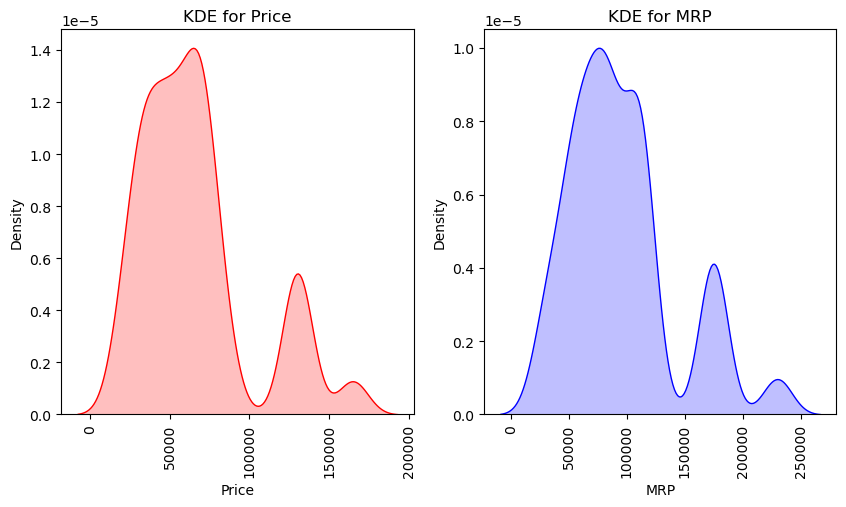

In [534]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

sns.kdeplot(df['price'], fill = True, color = 'red')
plt.title("KDE for Price")
plt.xlabel("Price")
plt.xticks(rotation= 90)

plt.subplot(1,2,2)
sns.kdeplot(df['mrp'], fill = True, color = 'blue')
plt.title("KDE for MRP")
plt.xlabel("MRP")
plt.xticks(rotation= 90)
plt.show()

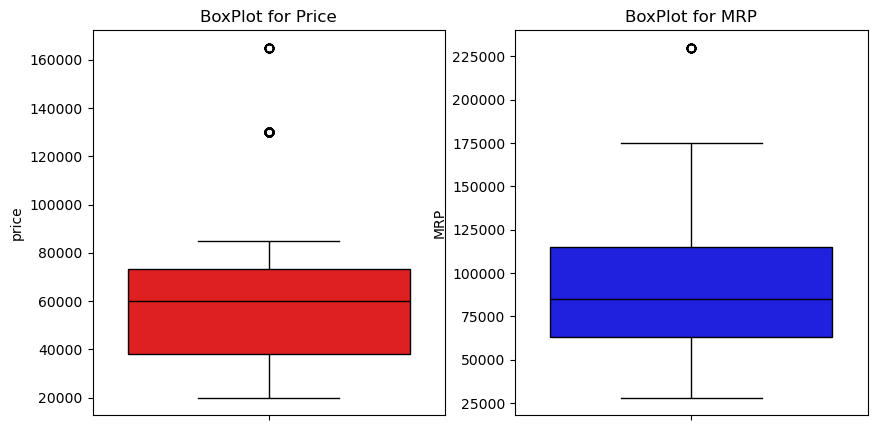

In [83]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(df['price'], fill = True, color = 'red', linecolor = 'black')
plt.title("BoxPlot for Price")


plt.subplot(1,2,2)
sns.boxplot(df['mrp'], fill = True, color = 'blue', linecolor = 'black')
plt.title("BoxPlot for MRP")
plt.ylabel("MRP")

plt.show()


## CONCLUSIONS For Price and MRP:-
    1. Both Price and MRP is sort of Normal Distribution but the Price KDE distribution clearly tells us the maximum number of laptops is ranging between 20000 to 100000.
    2. The minimum value of Price we have is 19990 and maximum value is 164990 and mean is 65678 and Q1, Q2, Q3 is  37990, 59990, 73190
    3. The minimum value of MRP we have is 27990 and maximum value is 229990 and mean is 95500 and Q1, Q2, Q3 is  62990, 84990, 229990
    4. There is very few Outliers in both Price and MRP

## Ratings
    - What is the distribution of ratings?
    - How many laptops have ratings below 3, 3–4, and above 4?
    - Identify the most frequent rating.

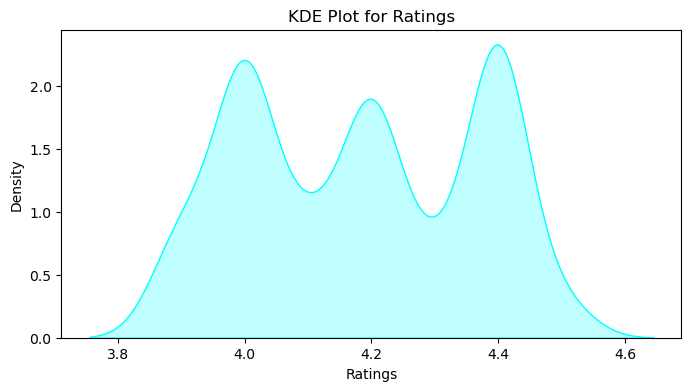

In [687]:
plt.figure(figsize = (8,4))
sns.kdeplot(df['star_rating'], fill = True, color = 'cyan')
plt.title("KDE Plot for Ratings")
plt.xlabel("Ratings")
plt.show()


In [573]:
df['star_rating'].mode()  # Most frequent Rating

0    4.4
Name: star_rating, dtype: float64

In [595]:
# How many laptops have ratings below 3, 3–4, and above 4?
df[df['star_rating'] <= 3].count().sum() 

0

In [619]:
# How many laptops have ratings between 3 and 4?
((df['star_rating'] > 3) & (df['star_rating'] <= 4)).sum()  

260

In [603]:
# How many laptops have ratings above 4?
(df['star_rating'] > 4).sum()  

509

## Conclusions for Ratings
    1. Total laptops Below 3 rating is 0, between 3 and 4 is 260 laptops and above is 509 ( It is a positive sign we have most laptops with highest ratings less laptop with minimum ratings
    2. Most frequent Rating we have is 4.4 out of 5( most people gives this ratings which is also the positive sign )

## OFF
    - What is the min, max, mean, and median discount?
    - Distribution of discount?


In [639]:
df['off'].describe()   

count    769.000000
mean       0.310208
std        0.064224
min        0.190000
25%        0.250000
50%        0.310000
75%        0.360000
max        0.450000
Name: off, dtype: float64

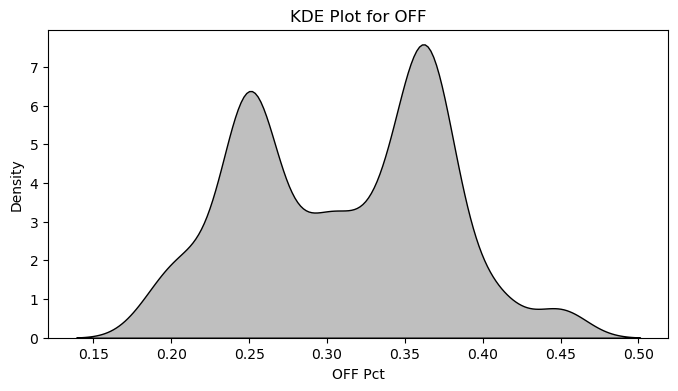

In [626]:
plt.figure(figsize = (8,4))
sns.kdeplot(df['off'], fill = True, color = 'black')
plt.title("KDE Plot for OFF")
plt.xlabel("OFF Pct")
plt.show()

## RAM 
    - Distribution of RAM sizes (e.g., 4, 8, 16, 32 GB).
    - Identify the most common RAM size

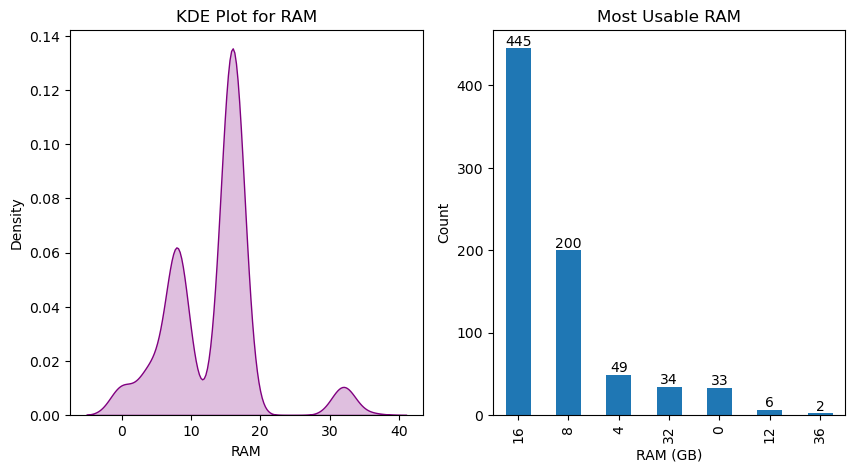

In [685]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Ram_GB'], color = 'purple', fill = True)
plt.title("KDE Plot for RAM")
plt.xlabel("RAM")

plt.subplot(1,2,2)
df['Ram_GB'].value_counts().plot(kind = 'bar')

for i, y in enumerate(df['Ram_GB'].value_counts()):
    plt.text(i, y, str(y), ha='center', va='bottom')
plt.title("Most Usable RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Count")


plt.show()

## Conclusions For RAM
    1. As you can see in the bar plot thw most usage ram we have is 16 GB followed by 8 GB and the least is 32 GB
    2. The most common RAM size we have is 16 GB

## Memeory Type
    - Distribution of RAM memory types (e.g., LPDDR4, DDR4, LPDDR5).
    - Count the frequency of each type.

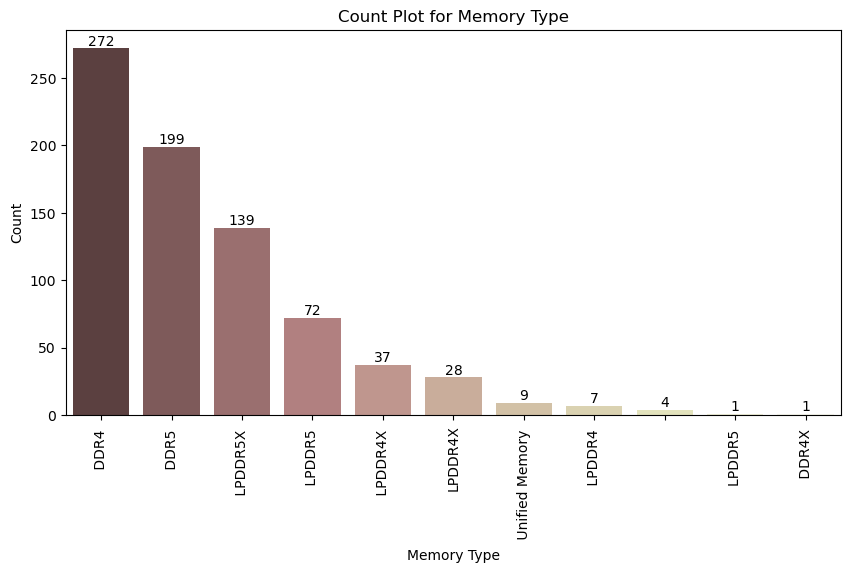

In [702]:
plt.figure(figsize=(10,5))
sns.countplot(x='memory_', data=df, palette='pink', order=df['memory_'].value_counts().index)

for i, v in enumerate(df['memory_'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title("Count Plot for Memory Type")
plt.xlabel("Memory Type")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()


## Conclusions For Memory Type
    1. As you can see in the bar plot the distribution of memory type we have most usage or common is DDR4 followed by DDR5 and LPDDR5X and values is 272, 199 and 139

## SSD Type
- Distribution of storage sizes (e.g., 256, 512 GB).
- Most common SSD size

In [710]:
df['ssd_type'].describe()

count    769.000000
mean     331.901170
std      235.857678
min        0.000000
25%        0.000000
50%      512.000000
75%      512.000000
max      512.000000
Name: ssd_type, dtype: float64

In [718]:
df['ssd_type'].value_counts()

ssd_type
512    474
0      245
256     48
128      2
Name: count, dtype: int64

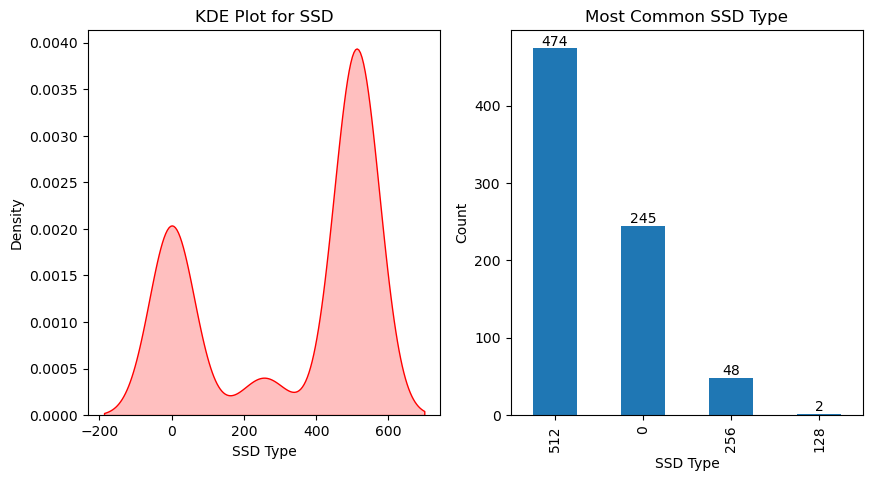

In [108]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

sns.kdeplot(df['ssd_type'], color = 'red', fill = True)
plt.title("KDE Plot for SSD")
plt.xlabel('SSD Type')

plt.subplot(1,2,2)
df['ssd_type'].value_counts().plot(kind='bar')
plt.title("Most Common SSD Type")
plt.xlabel("SSD Type")
plt.ylabel("Count")

for x,y in enumerate(df['ssd_type'].value_counts().values):
    plt.text(x,y, str(y), ha = 'center', va = 'bottom')


plt.show()

## Conclusions for SSD
    1. The distribution of SSD have the highest peak between 400 to 600 which tells us the the most usage SSD is 512 because the only SSD we have which falls in this range
    2. Same our bar plot tells us most common or most usage SSD Type is 512 with 474 count values and followed by 256 with values of 48.
    3. KDE Plot for SSD is looking like Bi-model

## Display in Inches
    - Distribution of screen sizes in inches.
    - Identify common sizes (13", 14", 15.6", 17").
    - Plot histogram/KDE

In [112]:
df['display_inch'].value_counts().head(6)

display_inch
15.6    344
14.0    253
16.0     76
0.0      45
14.1     19
13.3      7
Name: count, dtype: int64

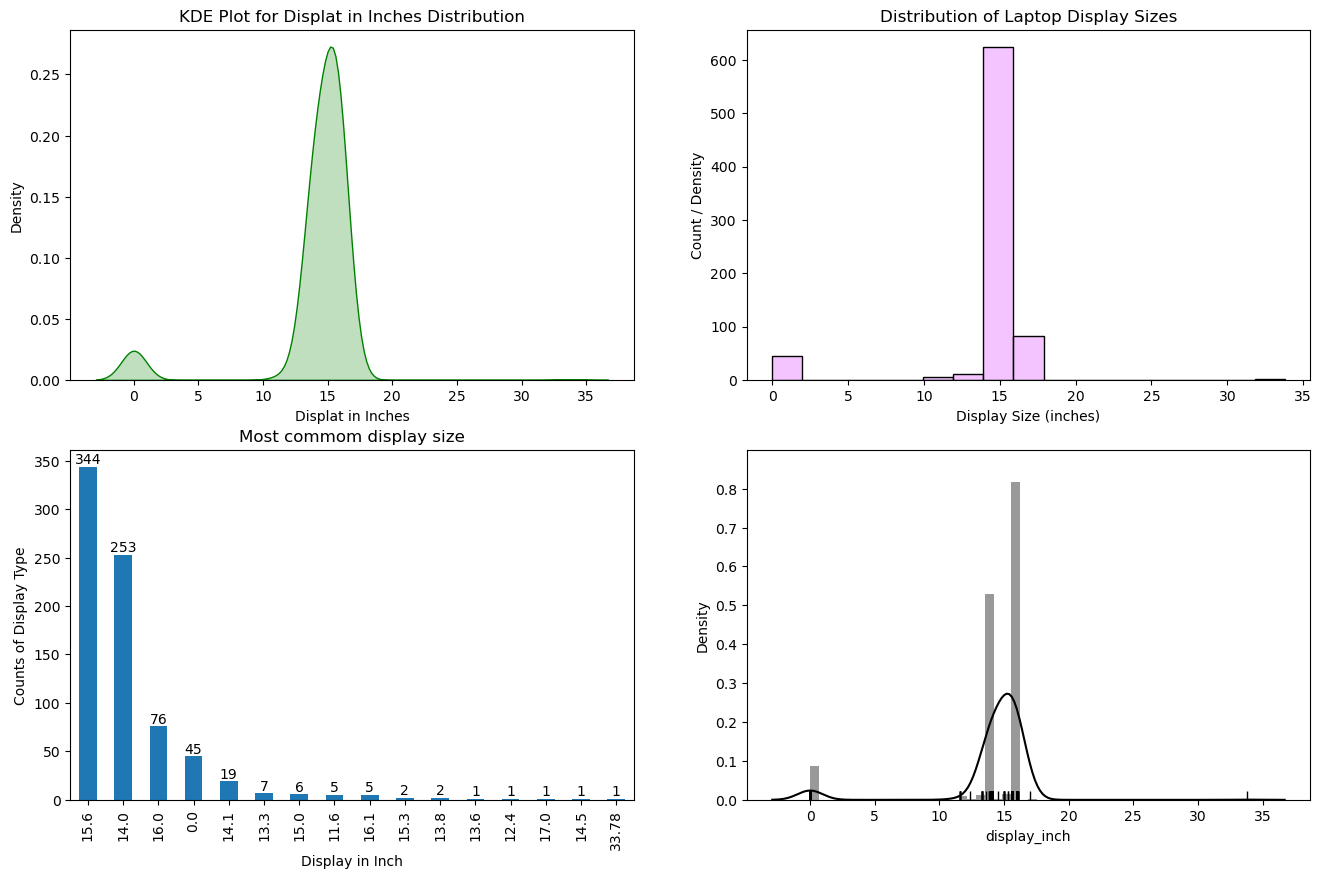

In [168]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)

sns.kdeplot(df['display_inch'], fill = True, color = 'green')
plt.xlabel("Displat in Inches")
plt.title("KDE Plot for Displat in Inches Distribution")

plt.subplot(2,2,2)
sns.histplot(df['display_inch'], bins=20, binwidth=2, 
             color='#EFABFF', edgecolor='black', alpha=0.7)

plt.title("Distribution of Laptop Display Sizes")
plt.xlabel("Display Size (inches)")
plt.ylabel("Count / Density")

plt.subplot(2,2,3)
df['display_inch'].value_counts().plot(kind='bar')
plt.title("Most commom display size")
plt.xlabel("Display in Inch")
plt.ylabel("Counts of Display Type")

for x,y in enumerate(df['display_inch'].value_counts().values):
    plt.text(x,y, str(y), ha = 'center', va = 'bottom')
    
plt.subplot(2,2,4)
sns.distplot(df['display_inch'], rug = True, hist = True, color = 'black')

plt.show()

## Conclusions for SSD
    1. Most usage display size for laptop is 15.6 followes by 14 Inch, as our graph tells us the same.
    2. The most usage size is 15 Inch with the count values is 344 followed by 14 Inch with 253
    3. The distribution of Inch we have is look like normal distribution

## Operating System
    - Distribution of OS types (Windows 11, Windows 10, others).
    - Count frequency of each OS

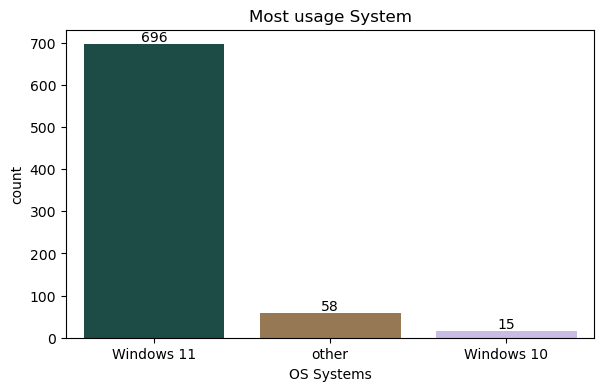

In [187]:
df['Operating_system'].value_counts()

plt.figure(figsize= (15,4))
plt.subplot(1,2,1)

sns.countplot(data=df, x=df['Operating_system'], fill = True, palette = 'cubehelix', order = df['Operating_system'].value_counts().index)

for x,y in enumerate(df['Operating_system'].value_counts().values):
    plt.text(x,y, str(y), ha = 'center', va = 'bottom')
plt.title("Most usage System")
plt.xlabel("OS Systems")
plt.show()

## Conclusion for Operating System
    1. The most usage system is Windows 11 with value counts is 696 and followed by others OS system with values 58 

## Brand
    1. Count of laptops per brand.
    2. Which brand has the highest/lowest number of laptops?
    3. Which brand has the lowest number of laptops?

In [885]:
# - Count of laptops per brand.
df.groupby(df['brand'])['brand'].count().sort_values(ascending = False)

brand
Lenovo       352
ASUS         138
MSI          118
Acer          48
DELL          46
HP            46
Primebook     21
Name: brand, dtype: int64

In [893]:
# - Which brand has the highest/lowest number of laptops?
(df['brand'].value_counts()[0] / df.shape[0]) * 100

45.77373211963589

In [895]:
# - Which brand has the lowest number of laptops?
(df['brand'].value_counts()[-1] / df.shape[0]) * 100

2.7308192457737324

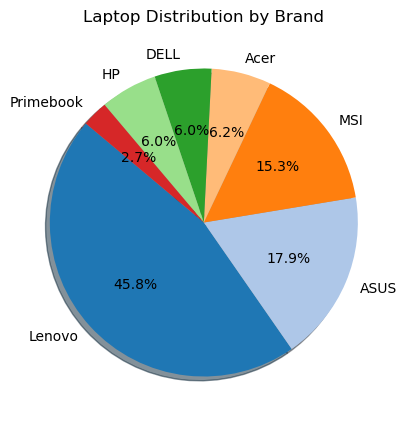

In [928]:
# - Plot bar chart of top 5 brands.

counts = df['brand'].value_counts()
labels = counts.index
sizes = counts.values

# Pie chart
plt.figure(figsize=(10,5))
plt.pie(sizes,
        labels=labels,
        autopct="%1.1f%%", 
        shadow=True,
        startangle=140,
        colors=plt.cm.tab20.colors)  

plt.title("Laptop Distribution by Brand")
plt.show()


## Conclusions for Brand 
    1. Top 3 brand by count is Lenovo, ASUS and MSI with count values is 352, 138, 118 followed by Acer and DELL with 48 and 46 value count
    2. The highest number of laptops Lenovo brand 352 and the lowest have Primebook with 21 value count.
    3. Lenovo is cover approx 46 % of total laptops followed by ASUS approx 18 %

## Touch Screen
    - How many laptops are touchscreen vs non-touchscreen?
    - Percentage of laptops with touchscreen

In [1076]:
# Percentage of laptops with touchscreen.
(df['IS_Touchscreen'].value_counts()[1] / df.shape[0]) * 100

8.322496749024708

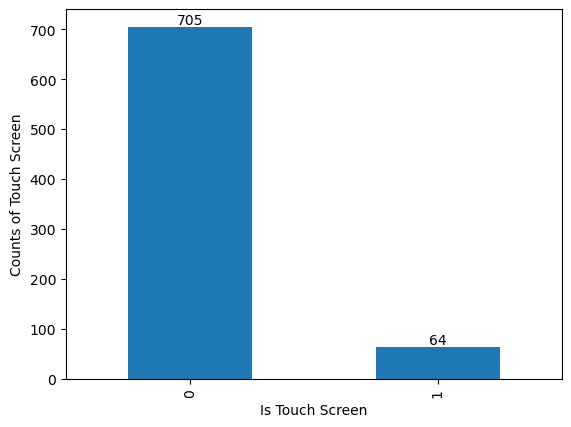

In [938]:
# - How many laptops are touchscreen vs non-touchscreen?

# 1 for Touch Screen and 0 for without Touch
df['IS_Touchscreen'].value_counts().plot(kind='bar')
plt.xlabel("Is Touch Screen")
plt.ylabel("Counts of Touch Screen")

for x,y in enumerate(df["IS_Touchscreen"].value_counts().values):
    plt.text(x,y, str(y), ha='center', va='bottom')

plt.show()

## Conclusions for Touch Screen Type
    1. We have only approx 8.3 % touch screen laptop
    2. In the value counts, The Touch screen laptops we have is 64 only while Non Touch screen is 705 ( it is huge difference)

## Processor
    - Distribution of processor types (Intel Core i5, AMD Ryzen 7, Others).
    - Count frequency of each type.

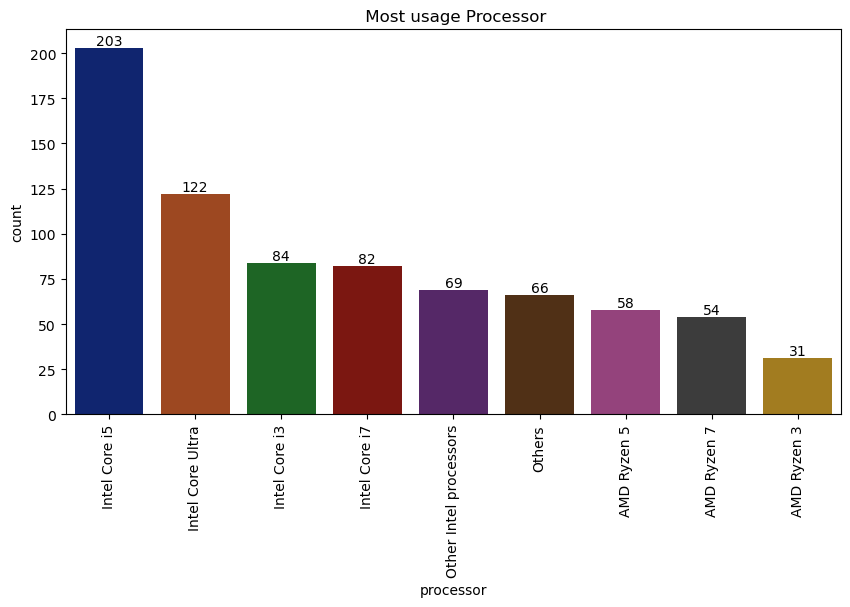

In [977]:
# - Count frequency of each type.
# - Distribution of processor types (Intel Core i5, AMD Ryzen 7, Others).

plt.figure(figsize = (10,5))
sns.countplot(data = df, x = df['processor'],  fill = True, order = df['processor'].value_counts().index, palette = "dark")
plt.title(" Most usage Processor")
plt.xticks(rotation = 90)

for x,y in enumerate(df['processor'].value_counts().values):
    plt.text(x,y, str(y), ha= 'center', va='bottom')

plt.show()

In [200]:
df['processor'].nunique()

9

## Conclusions for Processor 
    1. The most common processor we have is Intel core i5 with 203 value count followed by Intel core ultra with 122 value count
    2. Total kind of processor we have is 9 which include Intel i3,i5,i7, AMD Ryzen 3,5,7, Intel core ultra and others 

## Screen Type
    - Count of laptops per display size category (Small, Medium, Large, Extra Large).
    - Plot bar chart to visualize proportions

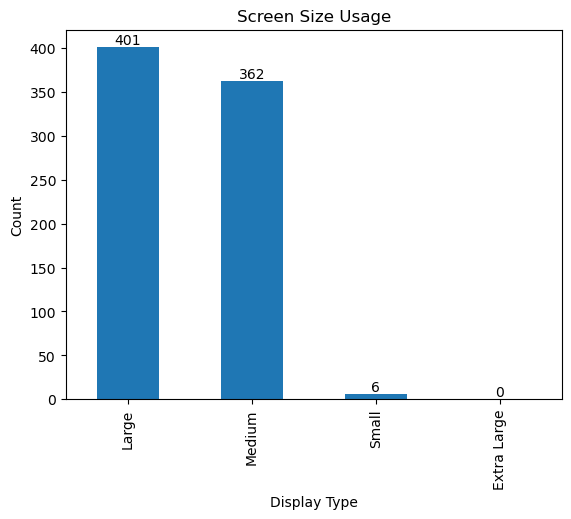

In [989]:
val = df.groupby(df['display_category'])['display_category'].count().sort_values(ascending = False)
val.plot(kind='bar')
plt.xlabel("Display Type")
plt.ylabel("Count")
plt.title("Screen Size Usage")

for x,y in enumerate(df['display_category'].value_counts().values):
    plt.text(x,y, str(y), ha='center', va='bottom')

plt.show()

## Conclusions for Processor 
    1. We have most common display category is Large display followed by Medium size with values counts is 401, 362 and others

## Generation Type
    - Distribution of CPU generations (10 Gen, 11 Gen, 12 Gen).
    - Count frequency of each generation.

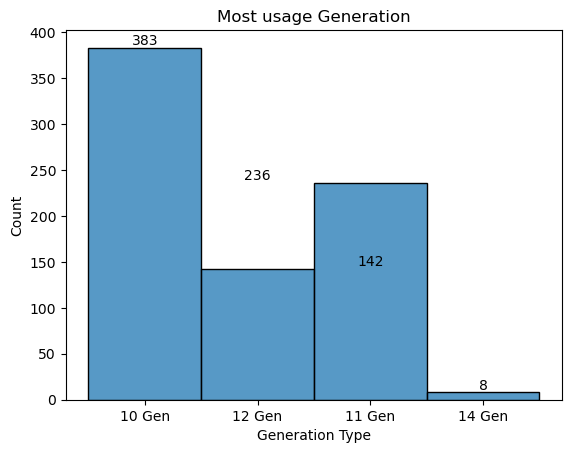

In [208]:
# Distribution of CPU generations (10 Gen, 11 Gen, 12 Gen).
# Count frequency of each generation.

sns.histplot(data=df, x=df['generation'])
plt.xlabel("Generation Type")
plt.ylabel("Count")
plt.title("Most usage Generation")

for x, y in enumerate(df['generation'].value_counts().values):
    plt.text(x,y, str(y), ha = 'center', va='bottom')

## Conclusions for Processor 
    1. The most common generation is 1oth generation followed by 12th and 11th generation with value counts 383, 236 and 142

In [250]:
ndf = df[['price', 'mrp', 'star_rating', 'off', 'number_of_ratings', 'number_of_review', 'IS_Touchscreen', 
          'Ram_GB', 'ssd_type', 'bit_type', 'display_inch', 'warranty_year']]
ndf.head(2)

,price,mrp,star_rating,off,number_of_ratings,number_of_review,IS_Touchscreen,Ram_GB,ssd_type,bit_type,display_inch,warranty_year
0,20990,29990,3.9,0.3,1322,120,0,0,0,0,0.0,1
1,20990,29990,3.9,0.3,1322,120,0,8,256,1,14.1,1


In [256]:
ndf.corr()['price']*100

price                100.000000
mrp                   98.860865
star_rating          -12.534040
off                  -24.878253
number_of_ratings    -31.490359
number_of_review     -27.861363
IS_Touchscreen        -0.895787
Ram_GB                 3.272604
ssd_type               2.246879
bit_type               1.423161
display_inch           6.091280
warranty_year         16.035266
Name: price, dtype: float64

<Axes: >

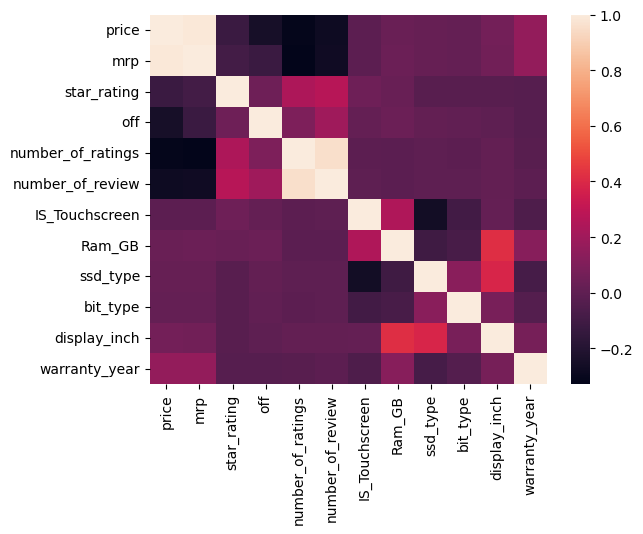

In [252]:
sns.heatmap(ndf.corr())

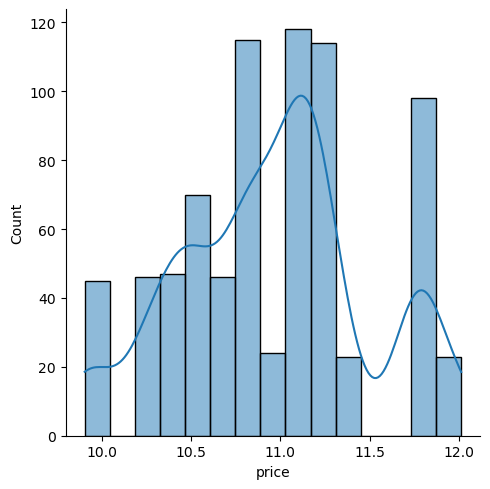

In [276]:
sns.displot(np.log(df['price']), kde = True)

## Prediction Model for Laptop

In [288]:
x = df.drop(columns = ('price'))
y = np.log(df['price'])

In [314]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [308]:
X_test, X_train, y_test, y_train = train_test_split(x, y, test_size = 0.2, random_state = 2)

## Linear Regressor

In [334]:
# Categorical Column Transformation by using One Hot Encoding
step1 = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), [3, 7, 9, 12, 14, 15])
    ],
    remainder='passthrough'
)

# Making a object of LinearRegression Class
lr = LinearRegression()

# Create Pipelines
pipe = Pipeline([
    ('preprocessor', step1),
    ('model', lr)
])

# Fit the data in model and predict the values
pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)


print("R² Score:", r2_score(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))


R² Score: 0.9235701808136151
MAE: 0.1109655378756071


In [339]:
# Error value
np.exp(0.11)

1.1162780704588713

## Ridge Regressor

In [343]:
# Categorical Column Transformation by using One Hot Encoding
step1 = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), [3, 7, 9, 12, 14, 15])
    ],
    remainder='passthrough'
)

# Making a object of LinearRegression Class
lr = Ridge(alpha = 10)

# Create Pipelines
pipe = Pipeline([
    ('preprocessor', step1),
    ('model', lr)
])

# Fit the data in model and predict the values
pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)


print("R² Score:", r2_score(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))

R² Score: 0.929670996132476
MAE: 0.10335397295236726


In [345]:
np.exp(0.10)

1.1051709180756477

## Lasso Regressor

In [369]:
# Categorical Column Transformation by using One Hot Encoding
step1 = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), [3, 7, 9, 12, 14, 15])
    ],
    remainder='passthrough'
)

# Making a object of LinearRegression Class
lr = Lasso(alpha = .001)

# Create Pipelines
pipe = Pipeline([
    ('preprocessor', step1),
    ('model', lr)
])

# Fit the data in model and predict the values
pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)


print("R² Score:", r2_score(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))

R² Score: 0.9405186200162557
MAE: 0.09800490334655725


In [359]:
np.exp(0.098)

1.1029627851085078

## Decision Tree [ Red Flag ]

In [384]:
# Categorical Column Transformation by using One Hot Encoding
step1 = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), [3, 7, 9, 12, 14, 15])
    ],
    remainder='passthrough'
)

# Making a object of LinearRegression Class
lr = DecisionTreeRegressor(max_depth = 5, random_state = 2)

# Create Pipelines
pipe = Pipeline([
    ('preprocessor', step1),
    ('model', lr)
])

# Fit the data in model and predict the values
pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)


print("R² Score:", r2_score(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))

R² Score: 0.9999081511006569
MAE: 0.0020921855202605116


## Random Forest

In [394]:
# Categorical Column Transformation by using One Hot Encoding
step1 = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), [3, 7, 9, 12, 14, 15])
    ],
    remainder='passthrough'
)

# Making a object of LinearRegression Class
lr = RandomForestRegressor( n_estimators = 100, random_state = 2, max_samples = 0.5, max_features = 0.75, max_depth = 5
)

# Create Pipelines
pipe = Pipeline([
    ('preprocessor', step1),
    ('model', lr)
])

# Fit the data in model and predict the values
pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)


print("R² Score:", r2_score(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))

R² Score: 0.993716119370348
MAE: 0.023078447167951696


In [399]:
import pickle
pickle.dump(df, open('DataFrame.pkl', 'wb'))
pickle.dump(pipe, open('Pipe.pkl', 'wb'))

In [401]:
df

,price,mrp,star_rating,off,brand,number_of_ratings,number_of_review,IS_Touchscreen,processor,Ram_GB,memory_,ssd_type,warranty_year,Operating_system,bit_type,generation,display_category,display_inch
0,20990,29990,3.9,0.30,Acer,1322,120,0,Others,0,LPDDR4X,0,1,other,0,10 Gen,Medium,0.0
1,20990,29990,3.9,0.30,Acer,1322,120,0,Other Intel processors,8,LPDDR5,256,1,Windows 11,1,12 Gen,Medium,14.1
2,20990,29990,3.9,0.30,Acer,1322,120,0,Intel Core i5,32,DDR4,512,1,Windows 11,1,11 Gen,Large,15.6
3,20990,29990,3.9,0.30,Acer,1322,120,0,Other Intel processors,8,DDR4,128,1,Windows 11,1,10 Gen,Small,11.6
4,20990,29990,3.9,0.30,Acer,1322,120,0,Intel Core i3,16,DDR4,512,1,Windows 11,0,11 Gen,Medium,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,65330,99990,3.9,0.34,Lenovo,35,2,0,Intel Core i3,8,DDR4,512,1,Windows 11,0,12 Gen,Medium,14.0
765,65330,99990,3.9,0.34,Lenovo,35,2,0,Intel Core i5,16,LPDDR5X,0,1,Windows 11,0,11 Gen,Medium,14.0
766,65330,99990,3.9,0.34,Lenovo,35,2,1,Intel Core Ultra,32,LPDDR5X,0,1,Windows 11,0,10 Gen,Medium,14.0
767,65330,99990,3.9,0.34,Lenovo,35,2,0,Intel Core i5,8,DDR4,512,1,Windows 11,1,11 Gen,Large,15.6
